Cleaning and transforming your data is vital to getting good results from your networks. This week, Siraj shows you how to use Pandas and Scikit-learn to prepare data for use in a neural network.

# Implementing Principal Component Analysis with Numpy

In [1]:
import numpy as np
np.random.seed(1) # consistency allows easier debugging

In [2]:
# 1st class of random samples with normal distribution
sample_mean = np.array([0,0,0])
sample_cov  = np.array([[1,0,0], [0,1,0], [0,0,1]])

class1 = np.random.multivariate_normal(sample_mean, sample_cov, 20).T
print(class1)

[[ 1.62434536 -1.07296862  1.74481176 -0.24937038 -0.3224172  -1.09989127
   0.04221375  1.14472371  0.90085595 -0.93576943 -0.69166075 -0.84520564
  -1.11731035  0.74204416 -0.74715829 -0.63699565  0.12015895 -0.35224985
  -0.20889423  0.93110208]
 [-0.61175641  0.86540763 -0.7612069   1.46210794 -0.38405435 -0.17242821
   0.58281521  0.90159072 -0.68372786 -0.26788808 -0.39675353 -0.67124613
   0.2344157  -0.19183555  1.6924546   0.19091548  0.61720311 -1.1425182
   0.58662319  0.28558733]
 [-0.52817175 -2.3015387   0.3190391  -2.06014071  1.13376944 -0.87785842
  -1.10061918  0.50249434 -0.12289023  0.53035547 -0.6871727  -0.0126646
   1.65980218 -0.88762896  0.05080775  2.10025514  0.30017032 -0.34934272
   0.83898341  0.88514116]]


In [3]:
# 2nd class of random samples 
sample_mean = np.array([1,1,1])
sample_cov  = np.array([[1,0,0], [0,1,0], [0,0,1]])

class2 = np.random.multivariate_normal(sample_mean, sample_cov, 20).T
print(class2)

[[ 0.24560206  0.70190716  2.13162939 -0.39649634  1.16003707 -1.02220122
   1.23009474  0.79924193  1.19829972  1.37756379  2.19891788  0.36126959
   0.65614632  1.69803203  1.40349164  1.16938243  0.73378149  1.31515939
   1.35054598 -0.61577235]
 [ 2.25286816  1.48851815  2.51981682 -0.44411381  1.87616892  0.69379599
   1.76201118  1.18656139  1.11900865  1.12182127  1.18515642  1.42349435
   1.04359686  0.55287144  1.59357852  1.74055645  1.03261455  1.84616065
  -0.31228341  2.12141771]
 [ 1.51292982  0.92442829  3.18557541  0.49553414  1.31563495  1.82797464
   0.77767186  1.41005165  0.32933771  2.12948391  0.62471505  1.07734007
   0.37999916  2.2245077  -0.09491185  0.0462994  -0.37311732  0.14048406
   0.96130449  1.40890054]]


Populating the interactive namespace from numpy and matplotlib


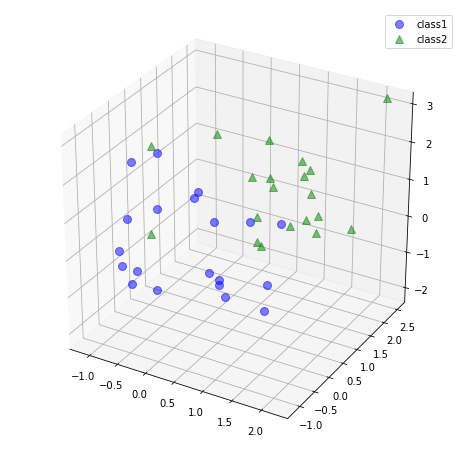

In [4]:
# Plot samples

%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10

ax.plot(class1[0,:], class1[1,:], class1[2,:], 'o', markersize=8, 
        color='blue', alpha=0.5, label='class1')
ax.plot(class2[0,:], class2[1,:], class2[2,:], '^', markersize=8, 
        color='green', alpha=0.5, label='class2')

ax.legend(loc='upper right')
plt.show()

In [5]:
# 1. Concatenate whole data set
dataset = np.concatenate((class1, class2), axis=1)
print(dataset)

[[ 1.62434536 -1.07296862  1.74481176 -0.24937038 -0.3224172  -1.09989127
   0.04221375  1.14472371  0.90085595 -0.93576943 -0.69166075 -0.84520564
  -1.11731035  0.74204416 -0.74715829 -0.63699565  0.12015895 -0.35224985
  -0.20889423  0.93110208  0.24560206  0.70190716  2.13162939 -0.39649634
   1.16003707 -1.02220122  1.23009474  0.79924193  1.19829972  1.37756379
   2.19891788  0.36126959  0.65614632  1.69803203  1.40349164  1.16938243
   0.73378149  1.31515939  1.35054598 -0.61577235]
 [-0.61175641  0.86540763 -0.7612069   1.46210794 -0.38405435 -0.17242821
   0.58281521  0.90159072 -0.68372786 -0.26788808 -0.39675353 -0.67124613
   0.2344157  -0.19183555  1.6924546   0.19091548  0.61720311 -1.1425182
   0.58662319  0.28558733  2.25286816  1.48851815  2.51981682 -0.44411381
   1.87616892  0.69379599  1.76201118  1.18656139  1.11900865  1.12182127
   1.18515642  1.42349435  1.04359686  0.55287144  1.59357852  1.74055645
   1.03261455  1.84616065 -0.31228341  2.12141771]
 [-0.528171

In [6]:
# 2. Compute the d dimensional mean vector
mean_x = np.mean(dataset[0])
mean_y = np.mean(dataset[1])
mean_z = np.mean(dataset[2])

mean_vector = np.array([[mean_x], [mean_y], [mean_z]])
print('Mean vector: \n', mean_vector)

Mean vector: 
 [[ 0.41667492]
 [ 0.69848315]
 [ 0.49242335]]


In [7]:
# 3. Compute the covariance matrix
cov_mat = np.cov(dataset)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 0.9868668   0.26943262  0.2855759 ]
 [ 0.26943262  0.92914135  0.30682016]
 [ 0.2855759   0.30682016  1.27528118]]


In [8]:
# 4. Compute Eigenvectors and Eigenvalues
eigen_val, eigen_vec = np.linalg.eig(cov_mat)

for i in range(len(eigen_val)):
    eigvec_sc = eigen_vec[:,i].reshape(1,3).T
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eigen_val[i]))

Eigenvector 1: 
[[-0.49210223]
 [-0.47927902]
 [-0.72672348]]
Eigenvalue 1 from scatter matrix: 1.6710094305328693
Eigenvector 2: 
[[-0.64670286]
 [-0.35756937]
 [ 0.67373552]]
Eigenvalue 2 from scatter matrix: 0.8383259734158454
Eigenvector 3: 
[[ 0.58276136]
 [-0.8015209 ]
 [ 0.13399043]]
Eigenvalue 3 from scatter matrix: 0.6819539303101815


In [9]:
# 5. Sort Eigenvector by decreasing value
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vec[:,i]) 
               for i in range(len(eigen_val))]
eigen_pairs.sort()
eigen_pairs.reverse()

for i in eigen_pairs:
    print(i[0])

# choose k dimension we need with k eigenvectors that correspond to the k largest eigenvalues
matrix_w = np.hstack((eigen_pairs[0][1].reshape(3,1),
                    eigen_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

1.67100943053
0.838325973416
0.68195393031
Matrix W:
 [[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]


In [10]:
# 6. Use d * k to transform samples to new subspace
# Dot product between original matrix and eigen pairs
transformed = matrix_w.T.dot(dataset)
assert transformed.shape == (2,40)

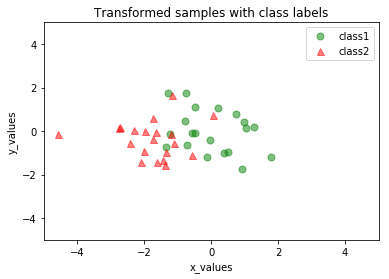

In [11]:
# Plot the reduced samples
plt.plot(transformed[0, 0:20], transformed[1,0:20],
        'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(transformed[0, 20:40], transformed[1, 20:40],
        '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

# Implementing P.C.A with Scikit-Learn

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(dataset)
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)
print(x_pca, end='\n\n')
print(pca.explained_variance_ratio_)

[[-1.84414159  5.80796653]
 [-4.55505761 -4.37063401]
 [ 6.3991992  -1.43733251]]

[ 0.54249299  0.45750701]


# Implementation Difference

Covariance Calculation:

Sklearn:

![Sklearn Covariance](https://render.githubusercontent.com/render/math?math=%5Csigma_%7Bij%7D%20%3D%20%5Cfrac%7B1%7D%7Bn%7D%20%5Csum_%7Bi%3D1%7D%5E%7Bn%7D%28x_i%20-%20%5Cbar%7Bx_i%7D%29%28x_j%20-%20%5Cbar%7Bx_j%7D%29&mode=inline)

Numpy: 
![Numpy Covariance](https://render.githubusercontent.com/render/math?math=%5Csigma_%7Bij%7D%20%3D%20%5Cfrac%7B1%7D%7Bn-1%7D%20%5Csum_%7Bi%3D1%7D%5E%7Bn%7D%28x_i%20-%20%5Cbar%7Bx%7D%29%28x_j%20-%20%5Cbar%7Bx_j%7D%29&mode=inline)

Reference Source: https://github.com/llSourcell/How_to_Simplify_Your_Data-LIVE-/blob/master/pca_notes.ipynb